<center><h1>Wojciech Sałapatek grupa 2b</h1></center>

***Zad1***

Współczynnik uwarunkowania jest bardzo duży, zatem niewielka zmiana wektora prawych stron równania spowoduje dużą zmianę rozwiązania. Co za tym idzie zadanie jest wrażliwe na błedy reprezentacji danych wejsciowych.

Rozwiązanie: 
$$\left[\begin{matrix}
1 & 1 \\
1 & 1.0001\\
\end{matrix}\right]x=
b_1 = \left[\begin{matrix}
2 \\
2.0001 \\
\end{matrix}\right]$$

$$\left[\begin{matrix}
1 & 1 \\
0 & 0.0001\\
\end{matrix}\right]x=
\left[\begin{matrix}
2 \\
0.0001 \\
\end{matrix}\right]$$


$$x_{1}=1, x_{2}=1$$


$$\left[\begin{matrix}
1 & 1 \\
1 & 1.0001\\
\end{matrix}\right]x=
b_2 = \left[\begin{matrix}
2 \\
2 \\
\end{matrix}\right]$$
$$\left[\begin{matrix}
1 & 1 \\
0 & 0.0001\\
\end{matrix}\right]x=
\left[\begin{matrix}
2 \\
0 \\
\end{matrix}\right]$$


$$x_{1}=2, x_{2}=0$$

In [6]:
import numpy as np
import math
import scipy.linalg as sc
import matplotlib.pyplot as plt
import scipy.sparse as spr
import scipy.sparse.linalg as slin



a_matrix = np.array([[1,1],[1,1.0001]])
b1 = np.array([2,2])
b1 = np.transpose(b1[np.newaxis,:])
cond =  np.linalg.cond(a_matrix)
print("Współczynnik uwarunkowania wynosi: {}".format(cond))
print(np.linalg.solve(a_matrix, b1))


Współczynnik uwarunkowania wynosi: 40002.000074915224
[[ 2.]
 [ 0.]]


***Zad2***

Współczynnik uwarunkowania macierzy jest bardzo duży, zatem niewielki błąd reprezentacji danych wejściowych w równaniu $Ax=b$ spowoduje duży błąd rozwiązania.

In [24]:
h_matrix = sc.hilbert(8)
column_norm = np.linalg.cond(h_matrix, p=1)
row_norm = np.linalg.cond(h_matrix, p=float("inf"))
spectral_norm = np.linalg.cond(h_matrix, p=2)

print("Wpółczynnik uwarunkowania dla normy kolumnowej: {}".format(column_norm))
print("Wpółczynnik uwarunkowania dla normy wierszowej: {}".format(row_norm))
print("Wpółczynnik uwarunkowania dla normy spektralnej: {}".format(spectral_norm))

Wpółczynnik uwarunkowania dla normy kolumnowej: 33872789110.107353
Wpółczynnik uwarunkowania dla normy wierszowej: 33872789109.75766
Wpółczynnik uwarunkowania dla normy spektralnej: 15257574847.190956


***Zad3***

Najszybciej działa metoda solve, następnie solve_triangular (nie licząc czasu rozkładu A), najwolniejszą metodą jest lstsq.
Wszystkie metody dają dobre jakościowo wyniki, najlepsze daje solve, następnie solve_triangular oraz lstsq.

In [63]:
import time
def timer(f):
    def wrap(*args,**kwargs):
        time1 = time.clock()
        ret = f(*args, **kwargs)
        time2 = time.clock()
        return time2-time1
    return wrap

t = np.linspace(0, 1, 20)
b = np.array([math.cos(4*i) for i in t])
b = np.transpose(b[np.newaxis,:])

a_matrix = np.vander(t, N=20, increasing=True)
t = np.transpose(t[np.newaxis,:])

solve_result = np.linalg.solve(a_matrix, b)
lstsq_result = np.linalg.lstsq(a_matrix, b)

def triangular(a_matrix, b):
    a_factored = np.linalg.qr(a_matrix)
    return sc.solve_triangular(a_factored[1], np.transpose(a_factored[0])@b)


timed_solve = timer(np.linalg.solve)
timed_triangular = timer(triangular)
timed_triangular_wth_fac = timer(sc.solve_triangular)
timed_lstsq = timer(np.linalg.lstsq)

a_factored = np.linalg.qr(a_matrix)
bp = np.transpose(a_factored[0])@b

solve_time = np.mean([timed_solve(a_matrix, b) for _ in range(1000)])
triangular_time = np.mean([timed_triangular(a_matrix, b) for _ in range(1000)])
trinagular_time_wth_fac = np.mean([timed_triangular_wth_fac(a_factored[1], bp) for _ in range(1000)])
lstsq_time = np.mean([timed_lstsq(a_matrix, b) for _ in range(1000)])

print("Średni czas dla solve: {}".format(solve_time))
print("Średni czas dla solve triangular: {}".format(triangular_time))
print("Średni czas dla solve triangular nie licząc czasu rozkładu A: {}".format(trinagular_time_wth_fac))
print("Średni czas dla lstsq: {}".format(lstsq_time))
print()

def r_norm(a, b, x):
    return np.linalg.norm(b - a@x)

print("Norma r dla solve: {}".format(r_norm(a_matrix, b, solve_result)))
print("Norma r dla solve triangular: {}".format(r_norm(a_matrix, b, triangular(a_matrix, b))))
print("Norma r dla lstsq: {}".format(r_norm(a_matrix, b, lstsq_result[0])))


Średni czas dla solve: 1.473857372184284e-05
Średni czas dla solve triangular: 0.00014414583471852893
Średni czas dla solve triangular nie licząc czasu rozkładu A: 4.894777242634518e-05
Średni czas dla lstsq: 9.375608643176747e-05

Norma r dla solve: 3.659212394130439e-15
Norma r dla solve triangular: 4.1782052831214096e-15
Norma r dla lstsq: 2.3692875334887135e-14


***Zad 4***

Współczynnik uwarunkowania rośnie niemal wykładniczo w zależności od $\tau$


Im wyższy współczynnik uwarunkowania macierzy tym dłuższy czas wykonania metod gmres oraz bicg. Zasada ta wydaje się nie działać w przypadku metody solve.

Dla metod solve wartość normy r rozwiązania początkowo rośnie w zależności od współczynnika uwarunkowania, poźniej jednak maleje. Dla gmres oraz bicg obserwujemy odwrotną sytuację, jednak różnice w wartości normy r rozwiązania są bardzo niewielkie.

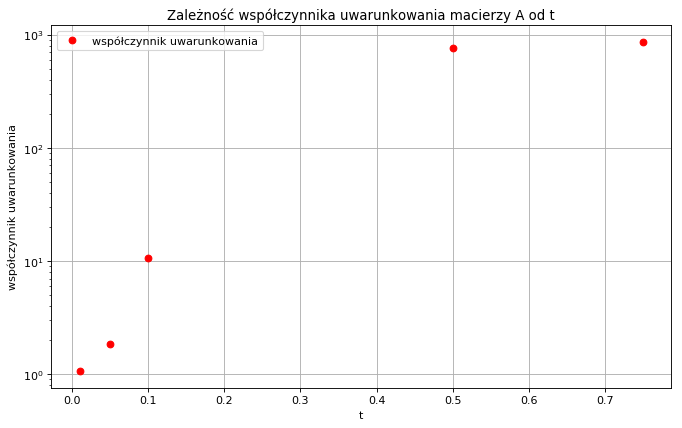

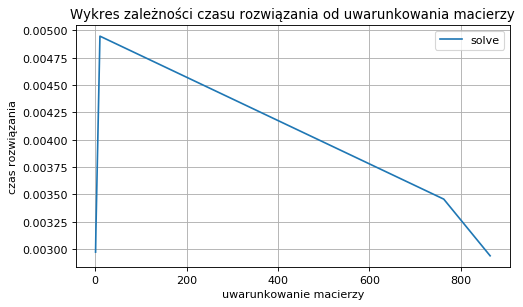

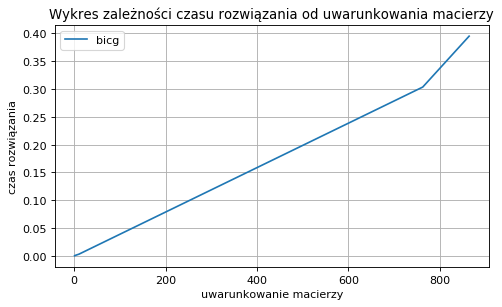

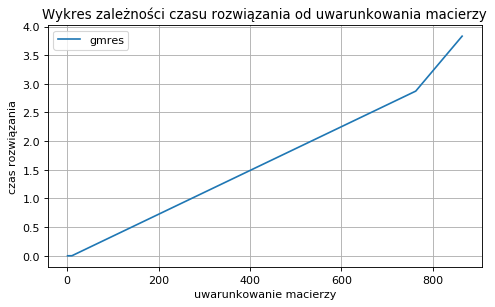

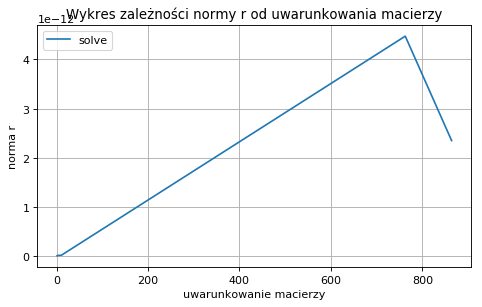

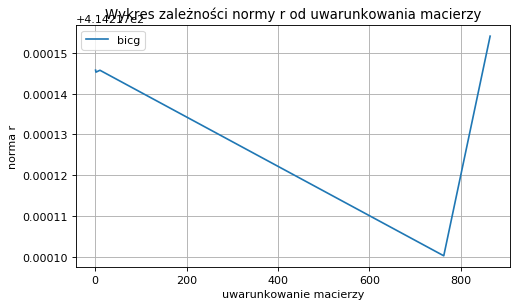

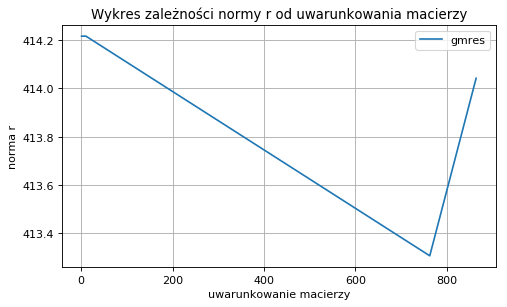

In [116]:
import time
import numpy as np
import math
import scipy.linalg as sc
import matplotlib.pyplot as plt
import scipy.sparse as spr
import scipy.sparse.linalg as slin
import time


def timer(f):
    def wrap(*args, **kwargs):
        time1 = time.clock()
        ret = f(*args, **kwargs)
        time2 = time.clock()
        return time2 - time1, ret

    return wrap


def create_a(n):
    a = np.diag(np.ones(n))
    for i in range(n):
        for j in range(n):
            if j == i:
                continue
            number = np.random.uniform(-1, 1)
            a[i, j] = number
            a[j, i] = number
    return a


def update_a(a, t):
    matrix = a.copy()
    matrix[np.abs(matrix) > t] = 0
    matrix = matrix + np.diag(np.ones(matrix.shape[0]))
    return matrix


def conds(a):
    t = np.array([0.01, 0.05, 0.1, 0.5, 0.75])
    cond = [np.linalg.cond(update_a(a, i)) for i in t]
    fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    plot = fig.add_subplot(111)
    plt.title("Zależność współczynnika uwarunkowania macierzy A od t")
    plot.semilogy(t, cond, 'ro', label="współczynnik uwarunkowania")
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("współczynnik uwarunkowania")
    plot.grid(True)
    plt.show()
    return cond


def draw(x, y, title, labels, xlabel, ylabel):
    for i in range(len(y)):
        fig = plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
        plt.title(title)
        plot = fig.add_subplot(111)
        plot.plot(x, y[i], label=labels[i])
        plt.legend()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plot.grid(True)
        plt.show()


def time_solutions(a, b):
    timed_solve = timer(np.linalg.solve)
    timed_bicg = timer(slin.bicg)
    timed_gmres = timer(slin.gmres)
    formatted_a = spr.csc_matrix(a, dtype=float)
    solves = [timed_solve(a, b) for i in range(50)]
    s_times = [p[0] for p in solves ]
    s_results = [p[1] for p in solves ]
    bicgs = [timed_bicg(formatted_a, b) for i in range(10)]
    b_times = [p[0] for p in bicgs ]
    b_results = [p[1] for p in bicgs ]
    g = timed_gmres(formatted_a, b, maxiter=1000)
    return [np.mean(s_times), np.mean(b_times), g[0]], [r_norm(a,b,s_results[0]), r_norm(formatted_a.toarray(),b,b_results[0][0]), r_norm(formatted_a.toarray(),b,g[1][0])]


a = create_a(500)
b = np.array([np.random.uniform(-1, 1) for i in range(500)])
b = np.transpose(b[np.newaxis, :])
t = np.array([0.01, 0.05, 0.1, 0.5, 0.75])

cond = conds(a)
if cond[4] < cond[3]:
    t[3], t[4] = t[4], t[3]
    cond[3], cond[4] = cond[4], cond[3]
stimes = []
btimes = []
gtimes = []

sresults = []
bresults = []
gresults = []
for i in t:
    tm = time_solutions(update_a(a, i), b)
    stimes.append(tm[0][0])
    btimes.append(tm[0][1])
    gtimes.append(tm[0][2])
    sresults.append(tm[1][0])
    bresults.append(tm[1][1])
    gresults.append(tm[1][2])

times = [stimes, btimes, gtimes]
rnorms = [sresults, bresults, gresults]
draw(cond, times, "Wykres zależności czasu rozwiązania od uwarunkowania macierzy",
     ["solve", "bicg", "gmres"], "uwarunkowanie macierzy", "czas rozwiązania")

draw(cond, rnorms, "Wykres zależności normy r od uwarunkowania macierzy",
     ["solve", "bicg", "gmres"], "uwarunkowanie macierzy", "norma r")

#wszystkie obliczenia w przyzpadku tej komórki zajmują kilkanaście sekund!


***Zad 5***

Implementacja metody daje identyczny wynik co metoda solve(gdy jest zbieżna).

W przypadku zaproponowanego układu, metoda Gaussa-Seidla zawodzi, gdyż niespełniony jest warunek zbieżnosci metody - 
promień spektralny macierzy Gaussa-Seidla jest większy niż 1.


In [98]:
def calculate(k, u, b, x, epsilon, iterations, max_iter=1500):
    if iterations > max_iter:
        return x
    
    new_x = -k@u@x + k@b
    
    if np.linalg.norm(new_x - x) < epsilon:
        return new_x
    else:
        return calculate(k, u, b, new_x, epsilon, iterations+1, max_iter)

def gauss_seidel(a, b, epsilon=1e-7, max_iter=1500, x=None):
    if x is None:
        x = np.ones(a.shape[1])
        x = np.transpose(x[np.newaxis, :])
        
    l = np.tril(a)
    u = a - l
    k = np.linalg.inv((l))
    m = -k@u
    
    if np.linalg.norm(m,2) > 1:
        print("Brak zbieżności!!!")
        print("Promień spektralny = {} > 1".format(np.linalg.norm(m,2)))
        return calculate(k, u, b, x, epsilon, 0, 100)
    return calculate(k, u, b, x, epsilon, 0, max_iter)
    
    
        
a = np.array([[4,-1,2], [3,8,-2], [1,1,3]])
b = np.array([[11],[2],[7]])
A = np.array([[1,2,3], [2,1,3], [3,2,1]])
b2 = np.array([[1], [2], [-0]])
print("Rozwiązanie metodą Gaussa-Seidela:\n {}".format(gauss_seidel(a, b)))
print("Rozwiązanie metodą solve:\n {}".format(np.linalg.solve(a,b)))
print()
solution = gauss_seidel(A, b2)
print("Rozwiązanie metodą Gaussa-Seidela:\n {}".format(solution))
print("Norma residuum rozwiązania: {}".format(r_norm(A,b2,solution)))
print("Rozwiązanie metodą solve:\n {}".format(np.linalg.solve(A,b2)))



Rozwiązanie metodą Gaussa-Seidela:
 [[ 1.88571429]
 [-0.02857143]
 [ 1.71428571]]
Rozwiązanie metodą solve:
 [[ 1.88571429]
 [-0.02857143]
 [ 1.71428571]]

Brak zbieżności!!!
Promień spektralny = 6.131344601508534 > 1
Rozwiązanie metodą Gaussa-Seidela:
 [[  1.61472349e+63]
 [ -3.79254744e+63]
 [  2.74092443e+63]]
Norma residuum rozwiązania: 7.983977827970716e+63
Rozwiązanie metodą solve:
 [[ 0.25]
 [-0.75]
 [ 0.75]]
